# Basic Classification using TensorFlow

In [1]:
# import TensorFlow and tf.Keras
import tensorflow as tf
from tensorflow import keras

# other useful libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print('using TensorFlow {}'.format(tf.__version__))

using TensorFlow 1.10.1


In [3]:
# import Fashion-MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
print('--Load Fashion-MNIST dataset...')
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print('DONE')

--Load Fashion-MNIST dataset...
DONE


In [4]:
# dataset review
print('\nDataset Review')
print('-----------------------------------------------------')
print('[INFO] train_images shape: {}'.format(train_images.shape))
print('[INFO] train_label shape: {}'.format(train_labels.shape))
print('')
print('[INFO] test_images shape: {}'.format(test_images.shape))
print('[INFO] test_label shape: {}'.format(test_labels.shape))
print('')
print('[INFO] labels: {}'.format(set(train_labels)))
print('-----------------------------------------------------\n')


Dataset Review
-----------------------------------------------------
[INFO] train_images shape: (60000, 28, 28)
[INFO] train_label shape: (60000,)

[INFO] test_images shape: (10000, 28, 28)
[INFO] test_label shape: (10000,)

[INFO] labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
-----------------------------------------------------



In [5]:
# class name
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Preprocess Data

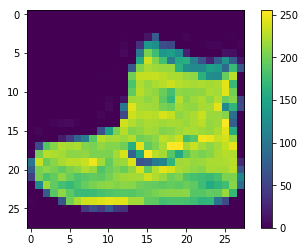

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [7]:
# scale train_image and test_images values to a rangeof 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

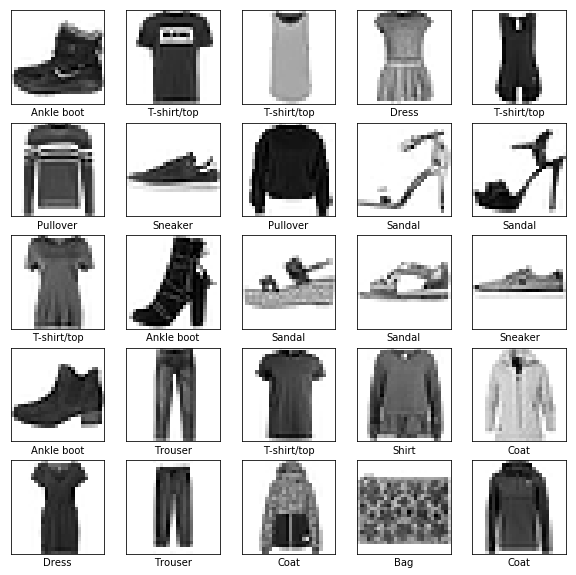

In [8]:
# display first 25 images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## Build the Model

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [10]:
# compile the model
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

## Train the Model

In [11]:
# train the model
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 55us/step - loss: 0.5034 - acc: 0.8234
Epoch 2/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.3794 - acc: 0.8643
Epoch 3/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.3386 - acc: 0.8770
Epoch 4/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.3147 - acc: 0.8848
Epoch 5/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.2976 - acc: 0.8901: 0s - loss: 0.2973 - 


## Evaluate accuracy

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy: {}', test_acc)

10000/10000 [==============================] - 0s 22us/step
Test accuracy: {} 0.8676


## Prediction

In [13]:
prediction = model.predict(test_images)

In [14]:
prediction[0]

array([1.0418678e-05, 1.9467764e-06, 1.0954168e-06, 2.6973709e-07,
       6.3176964e-07, 7.7317290e-02, 5.5045416e-07, 4.6038557e-02,
       5.4015454e-05, 8.7657517e-01], dtype=float32)

In [15]:
print('prediction result of first image: {}'.format(np.argmax(prediction[0])))
print('test label of first image: {}'.format(test_labels[0]))

prediction result of first image: 9
test label of first image: 9


In [16]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

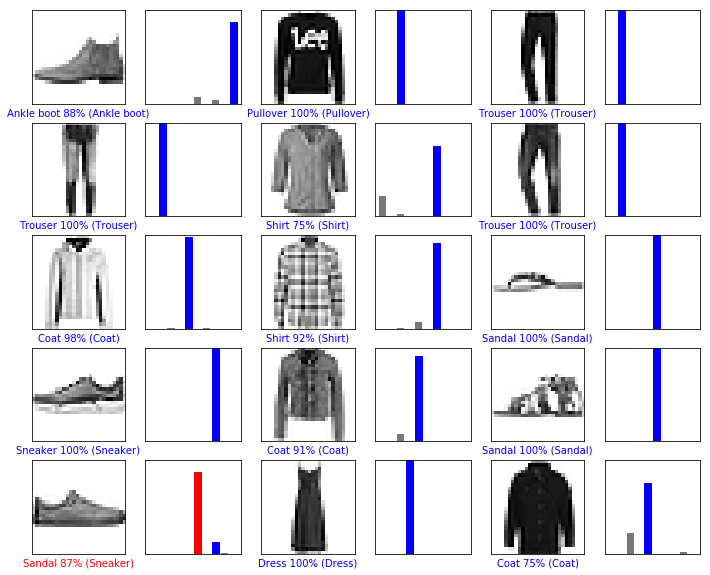

In [17]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediction, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediction, test_labels)

In [18]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.